In [1]:
import pandas as pd
from nltk.tokenize import sent_tokenize
import nltk
import matplotlib.pyplot as plt
nltk.download('all')
dataframe= pd.read_csv("superheroes_nlp_dataset.csv")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\velyd\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\velyd\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\velyd\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\velyd\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\velyd\AppData\Roaming\nltk_data...
[

In [2]:

# Kelime sayısını hesaplayan basit fonksiyon
def count_words(text):
    if pd.isnull(text):
        return 0
    words = text.split()  # Boşluklara göre kelimeleri ayırır
    return len(words)

# Yeni kolon ekleme
dataframe['history_word_count'] = dataframe['history_text'].apply(count_words)
dataframe['powers_word_count'] = dataframe['powers_text'].apply(count_words)
# Kontrol için ilk satırlara bakalım
print(dataframe[['history_text', 'history_word_count']].head(20))


                                         history_text  history_word_count
0   Delroy Garrett, Jr. grew up to become a track ...                  84
1   He was one of the many prisoners of Indian Hil...                 675
2    Richard "Rick" Jones was orphaned at a young ...                 988
3   Aa is one of the more passive members of the P...                 988
4   Aaron Cash is the head of security at Arkham A...                  26
5   ayla Secura was a Rutian Twi'lek Jedi Knight (...                 137
6    Sapien began life as Langdon Everett Caul, a ...                 821
7    Originally a history professor on the planet ...                 416
8   Formerly known as Emil Blonsky, a spy of Sovie...                 427
9   "Abra Kadabra" was a criminal time traveler fr...                  62
10  Citizen Abra was a stage magician in the 64th ...                  16
11  Born within the abstract entity Eternity, Abra...                 403
12  Carl "Crusher" Creel was an enhanc

In [11]:

def count_sentences_nltk(text):
    if pd.isnull(text) or text.strip() == "":
        return 0
    sentences = sent_tokenize(text)
    return len(sentences)

dataframe['history_sentence_count'] = dataframe['history_text'].apply(count_sentences_nltk)
dataframe['powers_sentence_count'] = dataframe['powers_text'].apply(count_sentences_nltk)

print(dataframe[['history_text', 'history_sentence_count','powers_text','powers_sentence_count']].head(20))

                                         history_text  history_sentence_count  \
0   Delroy Garrett, Jr. grew up to become a track ...                       5   
1   He was one of the many prisoners of Indian Hil...                      37   
2    Richard "Rick" Jones was orphaned at a young ...                      51   
3   Aa is one of the more passive members of the P...                      45   
4   Aaron Cash is the head of security at Arkham A...                       2   
5   ayla Secura was a Rutian Twi'lek Jedi Knight (...                       6   
6    Sapien began life as Langdon Everett Caul, a ...                      26   
7    Originally a history professor on the planet ...                      19   
8   Formerly known as Emil Blonsky, a spy of Sovie...                      15   
9   "Abra Kadabra" was a criminal time traveler fr...                       3   
10  Citizen Abra was a stage magician in the 64th ...                       1   
11  Born within the abstract

In [4]:
print(dataframe[["history_text","history_word_count","history_sentence_count"]].head(5))

                                        history_text  history_word_count  \
0  Delroy Garrett, Jr. grew up to become a track ...                  84   
1  He was one of the many prisoners of Indian Hil...                 675   
2   Richard "Rick" Jones was orphaned at a young ...                 988   
3  Aa is one of the more passive members of the P...                 988   
4  Aaron Cash is the head of security at Arkham A...                  26   

   history_sentence_count  
0                       5  
1                      37  
2                      51  
3                      45  
4                       2  


In [13]:
def rate_words_per_sentence(row):
    word_count = row['history_word_count']
    sentence_count = row['history_sentence_count']
    if sentence_count == 0:
        return 0
    return word_count / sentence_count

# Düzgün apply kullanımı (satır bazlı)
dataframe['history_avr_words_per_sentence'] = dataframe.apply(rate_words_per_sentence, axis=1)

print(dataframe[['history_text', 'history_avr_words_per_sentence']].head(10))


                                        history_text  \
0  Delroy Garrett, Jr. grew up to become a track ...   
1  He was one of the many prisoners of Indian Hil...   
2   Richard "Rick" Jones was orphaned at a young ...   
3  Aa is one of the more passive members of the P...   
4  Aaron Cash is the head of security at Arkham A...   
5  ayla Secura was a Rutian Twi'lek Jedi Knight (...   
6   Sapien began life as Langdon Everett Caul, a ...   
7   Originally a history professor on the planet ...   
8  Formerly known as Emil Blonsky, a spy of Sovie...   
9  "Abra Kadabra" was a criminal time traveler fr...   

   history_avr_words_per_sentence  
0                       16.800000  
1                       18.243243  
2                       19.372549  
3                       21.955556  
4                       13.000000  
5                       22.833333  
6                       31.576923  
7                       21.894737  
8                       28.466667  
9                      

In [14]:

def rate_words_per_sentence_powers(row):
    word_count = row['powers_word_count']
    sentence_count = row['powers_sentence_count']
    if sentence_count == 0:
        return 0
    return word_count / sentence_count

# Düzgün apply kullanımı (satır bazlı)
dataframe['powers_avr_words_per_sentence'] = dataframe.apply(rate_words_per_sentence_powers, axis=1)

print(dataframe[['powers_text', 'powers_avr_words_per_sentence']].head(10))


                                         powers_text  \
0                                                NaN   
1                                                NaN   
2    On rare occasions, and through unusual circu...   
3                                                NaN   
4                                                NaN   
5                                                NaN   
6   Abe is a humanoid amphibious creature. He has...   
7    Abin Sur possessed an exceptionally strong s...   
8  'Blonsky''s transformation into the Abominatio...   
9   Abra Kadabra was augmented with various nanot...   

   powers_avr_words_per_sentence  
0                       0.000000  
1                       0.000000  
2                      20.166667  
3                       0.000000  
4                       0.000000  
5                       0.000000  
6                      20.500000  
7                      19.000000  
8                      26.333333  
9                      15.071429 

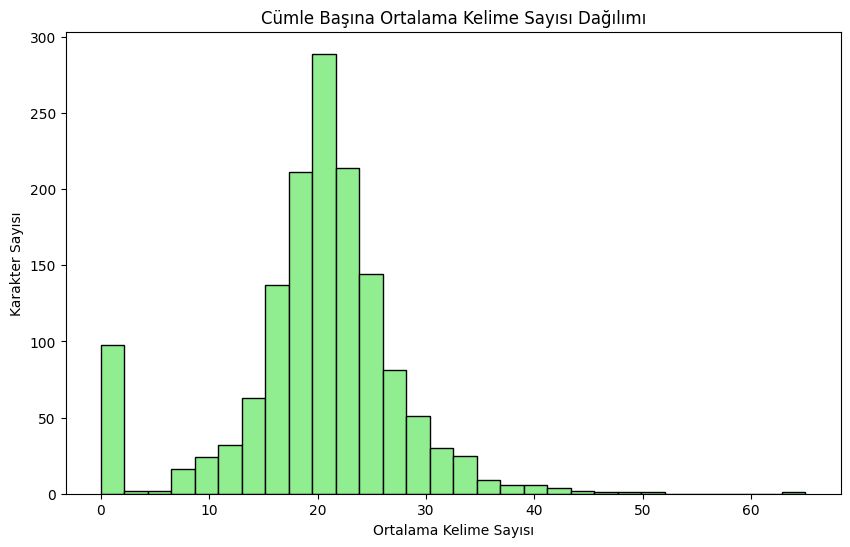

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(dataframe['history_avr_words_per_sentence'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Average Word Count per Sentence (History Text)")
plt.xlabel("Ortalama Kelime Sayısı")
plt.ylabel("Kahraman Sayısı")
plt.show()


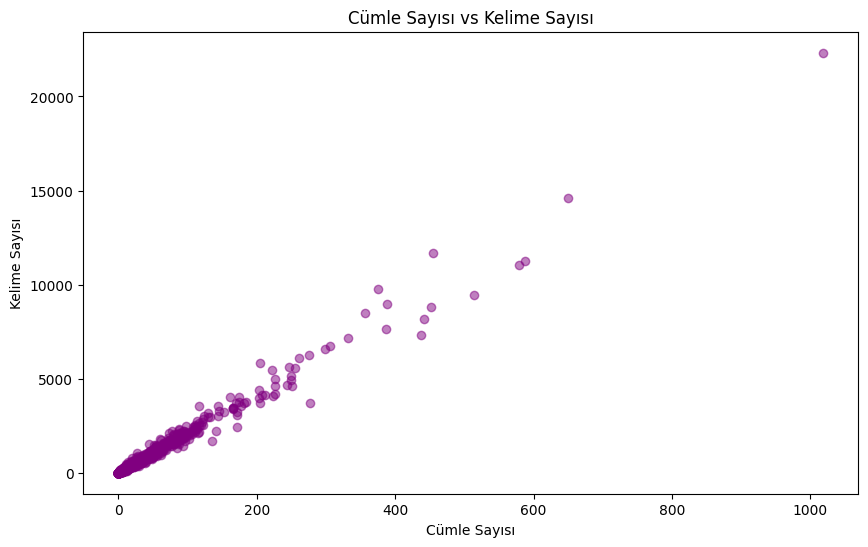

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(dataframe['history_sentence_count'], dataframe['history_word_count'], alpha=0.5, color='purple')
plt.title("Cümle Sayısı vs Kelime Sayısı")
plt.xlabel("Cümle Sayısı")
plt.ylabel("Kelime Sayısı")
plt.show()


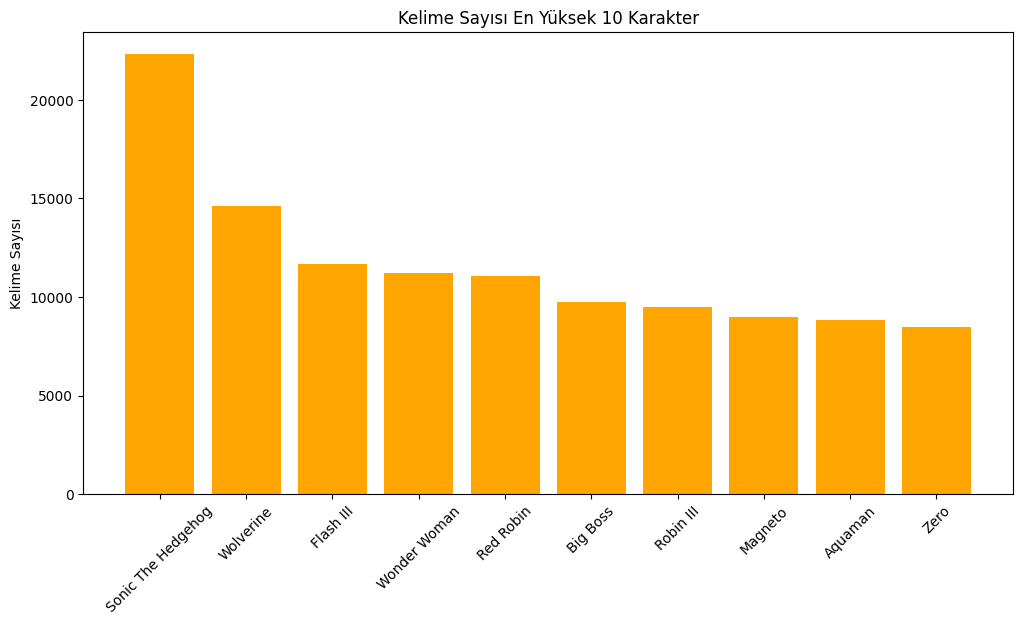

In [10]:
top_characters = dataframe.nlargest(10, 'history_word_count')
plt.figure(figsize=(12,6))
plt.bar(top_characters['name'], top_characters['history_word_count'], color='orange')
plt.title("Kelime Sayısı En Yüksek 10 Karakter")
plt.xticks(rotation=45)
plt.ylabel("Kelime Sayısı")
plt.show()
